In [2]:
import sys
sys.path.append("../src")

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from exact_solution import solve_master_equation, one_excited_emitter_state

In [3]:
def load_data(file_path):
    data = {f"{i:04b}": [] for i in range(16)}
    with open(file_path, 'r') as fp:
        lines = fp.readlines()

    for line in lines:
        if not line:
            continue
        l = line.strip().lstrip('[').rstrip(']')
        for l, v in zip(data.values(), l.split(',')):
            l.append(float(v.strip(' ')))

    return data

# JAQAL RAW
data = load_data('../data/QSCOUT/exp_data.txt')
qscout_results = pd.DataFrame.from_dict(data)

In [4]:
qscout_normalized_avged = qscout_results.copy()
qscout_normalized_avged[['1000', '0100', '0010', '0001']] = qscout_results[['1000', '0100', '0010', '0001']].divide(qscout_results[['1000', '0100', '0010', '0001']].sum(axis=1), axis=0)
qscout_normalized_avged['avg_0100_1000'] = qscout_normalized_avged[['0100', '1000']].mean(axis=1)

In [5]:
N = 3
g = 2
kappa = 5
times = np.linspace(0, 3, 51)

In [6]:
initial_state = one_excited_emitter_state(N, 1)
qutip_results = solve_master_equation(N, g, kappa, initial_state, times)

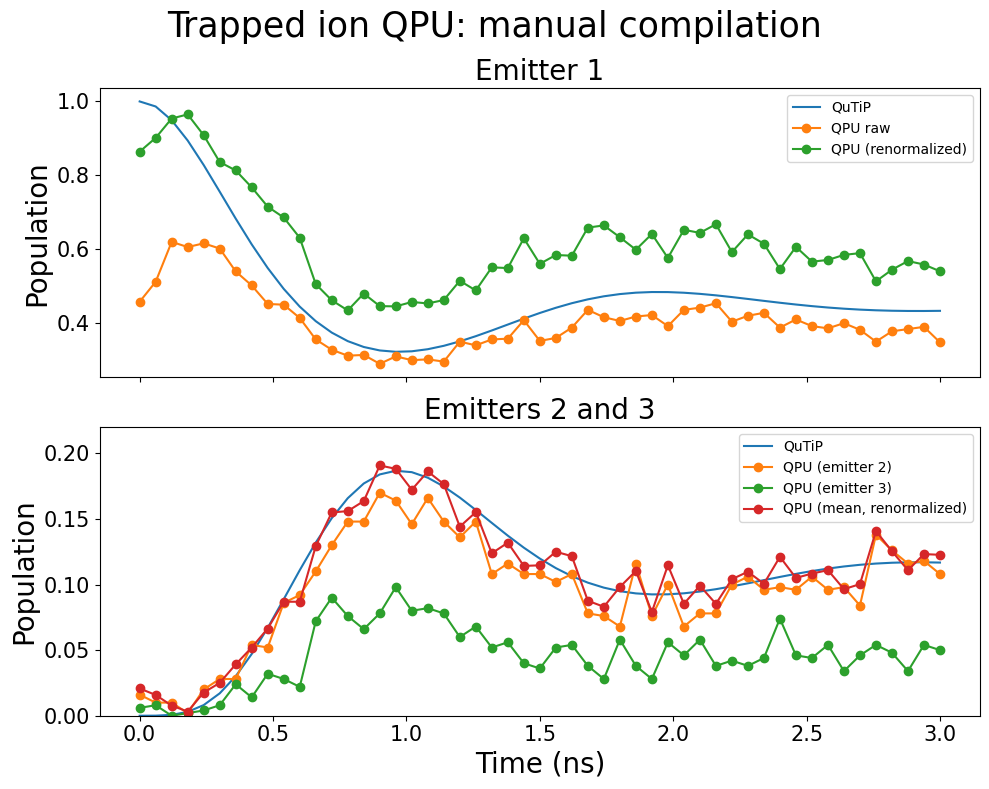

In [8]:
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
qscout_raw = qscout_results

axes[0].set_title("Emitter 1", fontsize=20)
axes[0].plot(qutip_results.index, qutip_results["Emitter 1"], label="QuTiP")
axes[0].plot(times, qscout_raw["0010"], marker='o', label="QPU raw")
axes[0].plot(times, qscout_normalized_avged["0010"], marker='o', label="QPU (renormalized)")
axes[0].set_ylabel("Population", fontsize=20)
axes[0].legend()
axes[0].tick_params(axis='y', labelsize=15)
axes[0].set_xticklabels([])

axes[1].set_title("Emitters 2 and 3", fontsize=20)
axes[1].plot(qutip_results.index, qutip_results["Emitter 2"], label="QuTiP")
axes[1].plot(times, qscout_raw["0100"], marker='o', label="QPU (emitter 2)")
axes[1].plot(times, qscout_raw["1000"], marker='o', label="QPU (emitter 3)")
axes[1].plot(times, qscout_normalized_avged["avg_0100_1000"], marker='o', label="QPU (mean, renormalized)")

axes[1].set_ylabel("Population", fontsize=20)
axes[1].legend()
axes[1].tick_params(axis='y', labelsize=15)
axes[1].tick_params(axis='x', labelsize=15)
axes[1].set_ylim(0, 0.22)
axes[1].set_xlabel("Time (ns)", fontsize=20)

fig.suptitle("Trapped ion QPU: manual compilation", fontsize=25)
plt.tight_layout()

In [9]:
fig.savefig("../figures/QSCOUT_jaqal_raw.eps")